In [1]:
import sys
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train_data.csv')
df

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id,connected
0,42593,1187660,411978,1089020,1187390,412220,1089160,304.185,353043.0,1182170.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
1,42594,1204580,682542,873138,1204640,682870,873890,725.431,244156.0,914243.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
2,42595,1191790,403683,1093180,1188590,402414,1092660,3423.030,363829.0,1171820.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
3,42596,1184320,419286,1082930,1186620,419721,1085540,3442.390,344267.0,1192340.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
4,42597,1189150,673302,944202,1188790,677771,942901,4442.380,313630.0,788566.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185827,228420,1260230,553602,913395,1262580,551457,912880,3162.000,86928.2,936997.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185828,228421,1214580,405321,916671,1212910,402240,915289,3503.660,114862.0,1136290.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185829,228422,1223920,375081,840987,1221050,372827,843288,3939.260,140923.0,1173670.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185830,228423,1253490,387870,853797,1257280,390086,854335,4192.360,110553.0,1126160.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False


In [3]:
df.dtypes

ID                                  int64
axonal_coor_x                       int64
axonal_coor_y                       int64
axonal_coor_z                       int64
dendritic_coor_x                    int64
dendritic_coor_y                    int64
dendritic_coor_z                    int64
adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
pre_rf_x                          float64
pre_rf_y                          float64
post_oracle                       float64
post_test_score                   float64
post_rf_x                         float64
post_rf_y                         float64
compartment                        object
pre_brain_area                     object
post_brain_area                    object
pre_nucleus_x                       int64
pre_nucleus_y                       int64
pre_nucleus_z                     

In [4]:
feature_weights = pd.read_csv('feature_weights.csv')
feature_weights

,nucleus_id,feature_weight_0,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,feature_weight_5,feature_weight_6,feature_weight_7,feature_weight_8,...,feature_weight_502,feature_weight_503,feature_weight_504,feature_weight_505,feature_weight_506,feature_weight_507,feature_weight_508,feature_weight_509,feature_weight_510,feature_weight_511
0,557058,0.205733,0.317099,-0.241713,0.014264,-0.314002,-0.432338,0.152562,0.186511,0.140944,...,-0.034500,0.363631,0.183755,0.231815,0.042877,0.402666,0.016072,0.072968,-0.452475,-0.175632
1,155650,0.166665,-0.293123,-0.017896,-0.159223,0.246045,-0.138767,0.217365,-0.174787,-0.050760,...,0.276523,0.333738,0.277954,-0.124248,0.228173,0.029465,0.198626,-0.044919,0.661572,0.110016
2,425987,0.453440,0.174334,0.279131,0.144052,0.218536,0.110859,-0.090576,0.125406,0.110690,...,0.300525,-0.160008,0.052873,0.112233,-0.091779,-0.046790,0.280856,0.399340,0.305763,0.218547
3,262149,0.537410,0.165957,0.543808,-0.386137,-0.113595,0.046351,0.054061,0.247789,-0.502975,...,-0.113184,0.117278,0.011819,0.491052,-0.161192,0.868506,0.215711,0.108492,-0.607824,0.296478
4,557067,-0.193376,-0.058421,-0.074607,0.009510,-0.038007,0.011739,-0.141879,0.308456,0.392383,...,0.327086,0.413605,-0.092548,-0.091461,-0.025144,-0.202813,0.241059,0.014646,-0.073372,-0.242132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,368622,-0.330541,0.475290,0.010314,0.532330,-0.475708,0.443309,0.129722,-0.246515,0.317328,...,-0.000365,-0.001144,0.316298,0.075985,0.049807,-0.024745,0.322744,-0.502619,0.218220,-0.048334
2688,614382,0.275322,0.435353,0.091335,-0.033993,-0.504363,-0.133884,-0.367399,0.478917,0.033984,...,0.121871,-0.017587,0.141196,0.140291,0.354196,-0.044375,0.495297,0.369650,0.114305,0.281917
2689,557041,-0.598981,0.061932,-0.074026,0.171314,-0.250348,0.438974,-0.235911,0.036702,0.365656,...,0.039513,-0.141897,-0.232804,0.020774,0.542075,0.380731,0.189838,0.150242,-0.222899,-0.032958
2690,196596,0.024009,0.075810,0.314906,-0.302266,0.007095,0.024825,0.432788,-0.238054,0.210615,...,0.218091,0.377625,0.157004,0.265006,0.412147,0.088211,0.780171,0.079002,-0.009118,0.244956


In [5]:
morph_embeddings = pd.read_csv('morph_embeddings.csv')
morph_embeddings

,nucleus_id,morph_emb_0,morph_emb_1,morph_emb_2,morph_emb_3,morph_emb_4,morph_emb_5,morph_emb_6,morph_emb_7,morph_emb_8,...,morph_emb_22,morph_emb_23,morph_emb_24,morph_emb_25,morph_emb_26,morph_emb_27,morph_emb_28,morph_emb_29,morph_emb_30,morph_emb_31
0,557058,0.748665,0.003966,-0.409828,0.549701,0.877232,-0.861881,0.629896,-0.630121,-1.311927,...,0.300712,-1.397289,1.118014,-0.183371,0.246255,0.496138,0.008009,0.349553,-1.490972,0.034168
1,155650,0.608481,-0.415141,0.365810,0.732117,-0.107357,-1.346027,-0.597964,-0.618534,-0.429153,...,-1.016053,-1.069679,0.031847,-0.703084,0.367078,-0.054149,0.341367,0.757009,-1.037782,-1.001121
2,425987,0.275470,0.384237,-0.591495,1.422552,0.587310,-1.279693,0.823187,-0.459843,-0.620660,...,0.094792,-1.221155,1.003695,-0.654525,-0.083740,0.745382,0.226264,0.034323,-1.541942,-0.342919
3,262149,0.642875,0.554093,-0.629258,1.279186,0.834185,-0.887523,1.052660,-0.252436,-0.479046,...,0.121963,-1.371947,0.946631,-0.399507,-0.180614,0.965515,0.514904,0.118434,-1.490275,-0.101109
4,557067,-0.099494,0.317106,-0.487286,0.963860,0.805484,-1.050071,1.271212,-0.220312,-0.938172,...,0.711220,-1.327322,0.914697,-0.734054,0.244786,0.235148,0.241681,0.445482,-1.314073,0.120069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,368622,0.873676,0.423390,-0.761424,0.347703,0.909603,-0.681839,1.954970,0.292521,-0.569789,...,0.631304,-1.632103,0.773492,-0.402078,0.333562,0.596720,0.634237,-0.052678,-1.086833,0.630007
2663,614382,0.285185,0.756431,-0.504513,1.221981,0.680886,-1.068822,0.794427,-0.820927,-0.719917,...,0.149082,-1.459964,0.895938,-0.809432,0.492356,0.290293,-0.056787,0.449943,-1.465123,-0.285587
2664,557041,1.000909,-0.269747,-0.404520,0.338924,0.988922,-0.975366,0.689095,-0.329750,-1.090898,...,0.104898,-1.258816,1.209954,-0.299763,0.031836,0.807699,0.286448,-0.137722,-1.562565,0.324807
2665,196596,1.121776,0.140512,-0.380805,0.313302,0.883713,-1.028015,1.484881,0.099239,-0.676376,...,0.400964,-1.606705,0.851969,-0.796522,0.432455,0.426968,0.166209,-0.090414,-1.111706,0.474158


### Data Merge

In [6]:
# join all feature_weight_i columns into a single np.array column
feature_weights["feature_weights"] = (
    feature_weights.filter(regex="feature_weight_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the feature_weight_i columns
feature_weights.drop(
    feature_weights.filter(regex="feature_weight_").columns, axis=1, inplace=True
)

# join all morph_embed_i columns into a single np.array column
morph_embeddings["morph_embeddings"] = (
    morph_embeddings.filter(regex="morph_emb_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the morph_embed_i columns
morph_embeddings.drop(
    morph_embeddings.filter(regex="morph_emb_").columns, axis=1, inplace=True
)

In [7]:
df = (
    df.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [8]:
print("Data Size:",df.shape)
print("\nData:")
df.info()

Data Size: (185832, 34)

Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185832 entries, 0 to 185831
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score                  185832 non-null

### EDA

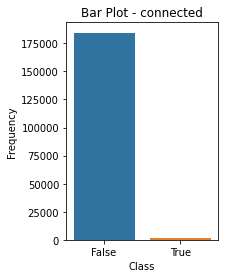

In [9]:
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="connected")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Bar Plot - connected")
plt.show()

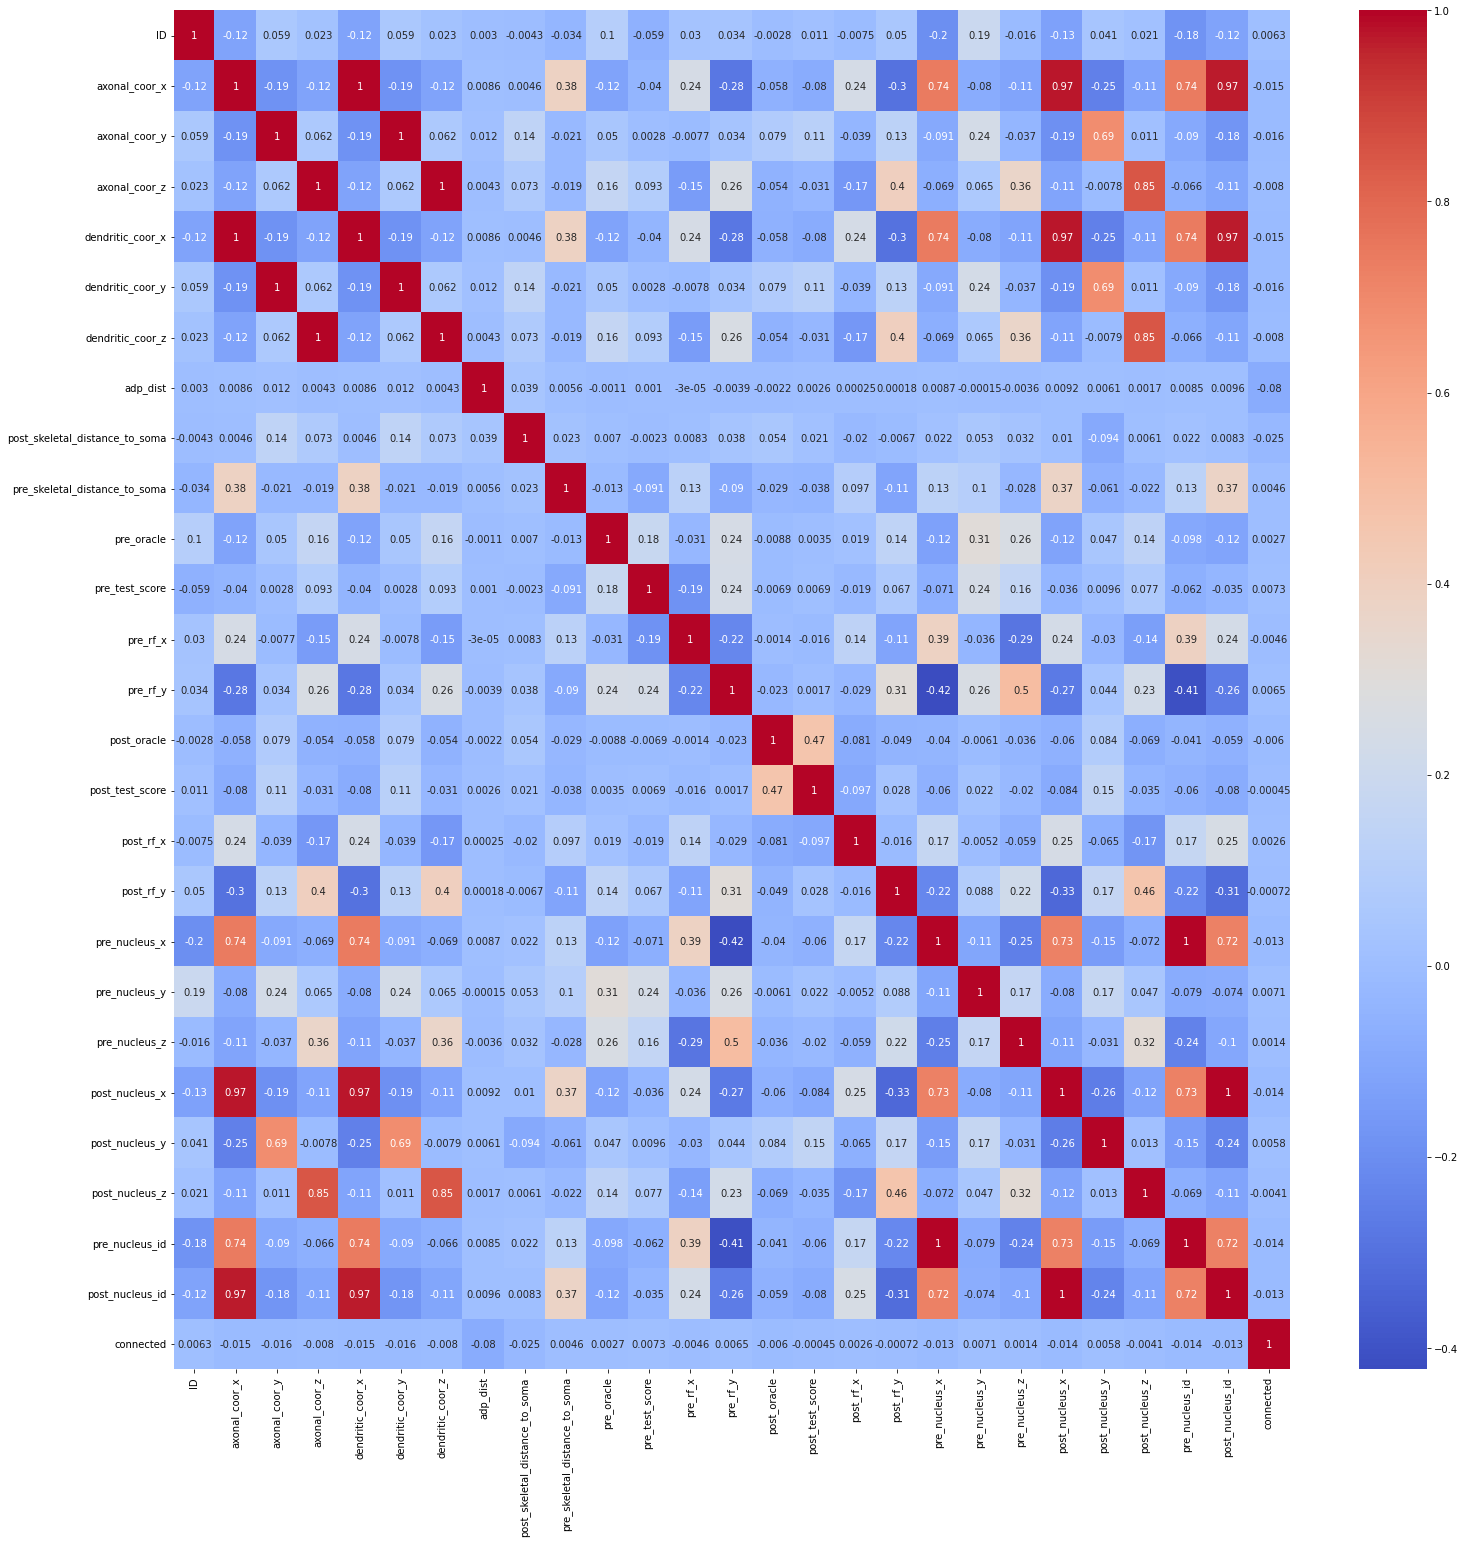

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
print(df['pre_morph_embeddings'][:20][1])

print(df['post_morph_embeddings'][:10][0])

[ 0.37331563  0.20981796 -0.12377156  0.69827348 -0.36436009 -0.08803897
 -0.95162904 -1.84342027 -0.53751272  0.48871696 -0.04196498  0.5997926
 -0.54694623 -0.75036496  0.55511707  0.52048707 -1.53206408  0.92715424
 -0.50563061  0.44323295  0.27195328  0.36682391  0.50746822  0.6308834
 -1.39840472  0.09875204  0.83224845 -0.98368824  1.08574307 -0.39546612
 -1.15127075 -0.4951764 ]
[ 1.0723995  -0.75409424  0.11248356 -0.33294636  0.74433136  1.22747672
 -0.83208716 -0.03111291 -0.36152899  0.55694693 -0.29966968 -0.0296001
  0.89789367 -2.2048285  -0.38498485 -1.06485069 -0.81627333 -0.21522449
 -0.59838223  0.54533499 -0.52522391  0.1716475   1.02296185 -0.04220269
 -0.64514601 -0.687774   -0.12143467 -0.93764007 -0.85765183 -0.41315266
 -0.3406806   0.79048932]


In [12]:
df['pre_morph_embeddings'].isna().sum()

47709

In [13]:
df['post_morph_embeddings'].isna().sum()

0

In [14]:
type(df['pre_morph_embeddings'][:20][1])

numpy.ndarray

In [15]:
# Check which arrays in the Series have NaN values
pre_morph_series = df['pre_morph_embeddings']
arrays_with_nan = pre_morph_series[pre_morph_series.apply(lambda arr: np.isnan(arr).any())]

# Now 'arrays_with_nan' is a boolean Series indicating which arrays have NaN values
print(arrays_with_nan)

20458     NaN
20459     NaN
20460     NaN
20461     NaN
20462     NaN
         ... 
179187    NaN
179188    NaN
179189    NaN
179190    NaN
179191    NaN
Name: pre_morph_embeddings, Length: 47709, dtype: object


In [19]:
print(df['compartment'])
print(df['compartment'].unique())
print(df['compartment'].nunique())

0                axon
1                axon
2                axon
3                axon
4                axon
             ...     
185827           axon
185828    apical_tuft
185829    apical_tuft
185830    apical_tuft
185831           axon
Name: compartment, Length: 185832, dtype: object
['axon' 'oblique' 'apical' 'basal' 'soma' 'apical_tuft' 'apical_shaft']
7


In [ ]:
df.describe()

### Pre-processing

In [20]:
#cosine similarity function
def row_feature_similarity(row):
    pre = row["pre_feature_weights"]
    post = row["post_feature_weights"]
    return (pre * post).sum() / (np.linalg.norm(pre) * np.linalg.norm(post))

In [21]:
# get the difference between pre and post nucleus distance
def get_dist(row):
    return np.linalg.norm(np.array([row['pre_nucleus_x'], row['pre_nucleus_y'], row['pre_nucleus_z']]) - 
                         np.array([row['post_nucleus_x'], row['post_nucleus_y'], row['post_nucleus_z']]))

In [59]:
from sklearn.preprocessing import StandardScaler

def feat_engineering(data):
    # Combine our pre and post areas into one projection group feature
    data["projection_group"] = (
        data["pre_brain_area"].astype(str)
        + "->"
        + data["post_brain_area"].astype(str)
    )
    data = data.drop(columns = ['pre_brain_area', 'post_brain_area'])
    
    # label encode our projection groups
    data["projection_group"] = pd.factorize(data["projection_group"])[0]
    
    
    # Get the distance between pre and post nucleus
    data["nucleus_dist"] = data.apply(get_dist, axis=1)
    data = data.drop(columns = ['pre_nucleus_x', 'pre_nucleus_y', 'pre_nucleus_z',
                               'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z'])
    
    
    # combine axonal and dendritic coords
    data['axonal_dendritic_x'] = (data['axonal_coor_x'] + data['dendritic_coor_x'])/2
    data['axonal_dendritic_y'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data['axonal_dendritic_z'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data = data.drop(columns = ['axonal_coor_x', 'axonal_coor_y', 'axonal_coor_z',
                           'dendritic_coor_x', 'dendritic_coor_y', 'dendritic_coor_z'])
    
    
    # combine feature similarities
    data["fw_similarity"] = data.apply(row_feature_similarity, axis=1)
    data = data.drop(columns=['pre_feature_weights', 'post_feature_weights'])
    
    # one hot encode the 7 unique compartment types
    data = pd.get_dummies(data, columns=['compartment'], prefix=['compartment'])
    
    # Since this feature has missing values, some rows do not have an array of embeddings at all
    data['pre_morph_embeddings'].fillna(method='ffill', inplace=True)
    
    # Split the embedding feature arrays into individual features
    pre_embedding_columns = [f"pre_embedding_{i}" for i in range(32)]
    data[pre_embedding_columns] = data['pre_morph_embeddings'].apply(pd.Series)
    
    post_embedding_columns = [f"post_embedding_{i}" for i in range(32)]
    data[post_embedding_columns] = data['post_morph_embeddings'].apply(pd.Series)
    data = data.drop(columns = ['pre_morph_embeddings', 'post_morph_embeddings'])
    
    # fill in any remaining NaNs, temp solution for now
    data.fillna(method='ffill', inplace=True)
    
    # scaling
    scaler = StandardScaler()    
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    return data

In [23]:
from sklearn.decomposition import PCA

def dim_reduction(data):
    # Run PCA to reduce the number of embedding features
    # Specify the number of components you want to retain
    num_components = int(np.sqrt(len(data.columns))) # Adjust based on your analysis

    pca = PCA(n_components=num_components)
    embeddings_pca = pca.fit_transform(data.iloc[:, -64:])
    
    pca_feature_names = [f'pca_{i}' for i in range(1, 1 + num_components)]
    
    data.drop(data.columns[-64:], axis=1, inplace=True)
    data[pca_feature_names] = embeddings_pca
    
    return data

In [24]:
y = df['connected']
X = df.drop(columns = ['ID', 'connected'])
X = feat_engineering(X)
X = dim_reduction(X)

In [25]:
X.dtypes

adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
pre_rf_x                          float64
pre_rf_y                          float64
post_oracle                       float64
post_test_score                   float64
post_rf_x                         float64
post_rf_y                         float64
pre_nucleus_id                    float64
post_nucleus_id                   float64
projection_group                  float64
nucleus_dist                      float64
axonal_dendritic_x                float64
axonal_dendritic_y                float64
axonal_dendritic_z                float64
fw_similarity                     float64
compartment_apical                float64
compartment_apical_shaft          float64
compartment_apical_tuft           float64
compartment_axon                  float64
compartment_basal                 

In [26]:
X.head(10)

,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,pre_rf_x,pre_rf_y,post_oracle,post_test_score,post_rf_x,...,compartment_soma,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-1.515697,2.007164,0.931055,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.103005,1.012940,6.942628,-0.768733,-2.945950,2.612974,-1.847013,-0.914103,-2.229749,0.020252
1,-1.225578,1.070301,0.268030,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.103005,1.012940,6.942628,-0.768733,-2.945950,2.612974,-1.847013,-0.914103,-2.229749,0.020252
2,0.632301,2.099967,0.905442,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.103005,1.012940,6.942628,-0.768733,-2.945950,2.612974,-1.847013,-0.914103,-2.229749,0.020252
3,0.645635,1.931656,0.956222,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.103005,1.012940,6.942628,-0.768733,-2.945950,2.612974,-1.847013,-0.914103,-2.229749,0.020252
4,1.334344,1.668055,-0.042977,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.103005,1.012940,6.942628,-0.768733,-2.945950,2.612974,-1.847013,-0.914103,-2.229749,0.020252
5,0.845858,1.264106,0.019040,0.037561,0.78798,0.314844,-0.678039,-1.855221,-1.348857,-0.471062,...,-0.103005,-0.045452,8.660203,1.120320,0.722543,0.071629,-0.603079,-0.341628,-1.876082,-0.818772
6,-1.408253,-0.356693,0.292212,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,-0.103005,2.440482,5.044283,-1.005532,-3.352642,0.113100,-0.479825,-0.102872,-2.834736,0.268292
7,-1.366682,-0.006678,-1.005338,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,-0.103005,2.440482,5.044283,-1.005532,-3.352642,0.113100,-0.479825,-0.102872,-2.834736,0.268292
8,-1.149227,1.005349,-0.315775,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,-0.103005,2.440482,5.044283,-1.005532,-3.352642,0.113100,-0.479825,-0.102872,-2.834736,0.268292
9,-0.811027,1.565125,0.052589,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,-0.103005,2.440482,5.044283,-1.005532,-3.352642,0.113100,-0.479825,-0.102872,-2.834736,0.268292


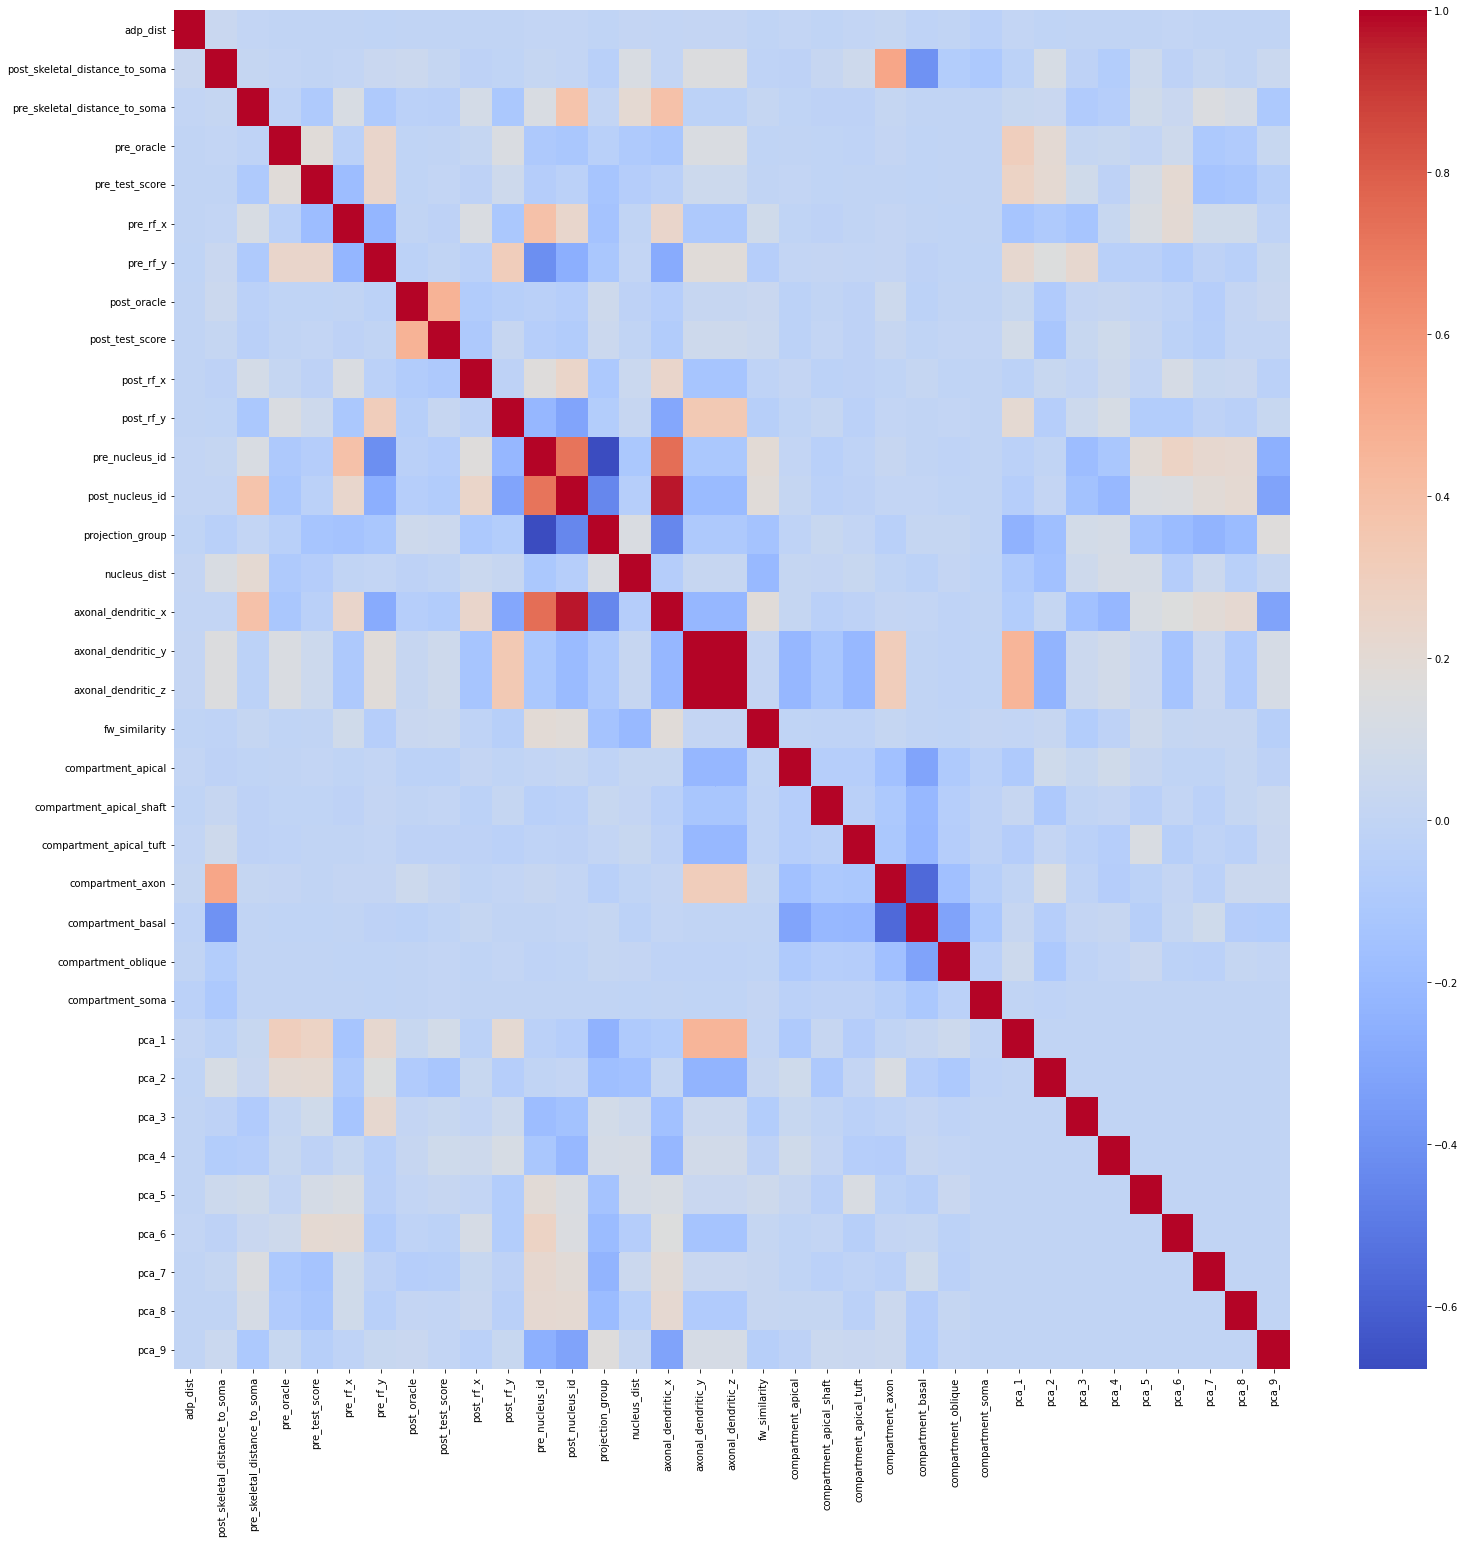

In [27]:
plt.figure(figsize = (25,25))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.show()

In [28]:
print(X['fw_similarity'].head(20))

0    -0.182150
1    -0.182150
2    -0.182150
3    -0.182150
4    -0.182150
5     0.299404
6     0.974132
7     0.974132
8     0.974132
9     0.974132
10    0.974132
11    0.974132
12    0.974132
13    0.974132
14    0.974132
15    0.974132
16    0.974132
17   -0.527449
18   -0.527449
19   -0.527449
Name: fw_similarity, dtype: float64


In [29]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(
    X, y
)

X_train, X_valid, y_train, y_valid = train_test_split(
     X, y, test_size=0.1, random_state=42)

### Model Fitting

In [30]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


model = LogisticRegressionCV(random_state = 42)
model.fit(X_train, np.ravel(y_train)) 
yhat = model.predict(X_valid)

loss = log_loss(yhat, y_valid)
print(loss)

print(classification_report(y_valid, yhat))




7.346123047676103
              precision    recall  f1-score   support

       False       0.83      0.71      0.77     18297
        True       0.75      0.86      0.80     18597

    accuracy                           0.79     36894
   macro avg       0.79      0.79      0.79     36894
weighted avg       0.79      0.79      0.79     36894



In [31]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(X_train, np.ravel(y_train)) 
yhat = modelNB.predict(X_valid)

loss = log_loss(yhat, y_valid)
print(loss)

print(classification_report(y_valid, yhat))




9.633122136465241
              precision    recall  f1-score   support

       False       0.94      0.46      0.62     18297
        True       0.65      0.97      0.78     18597

    accuracy                           0.72     36894
   macro avg       0.80      0.72      0.70     36894
weighted avg       0.80      0.72      0.70     36894



In [32]:
from sklearn.ensemble import RandomForestClassifier

    
modelRF = RandomForestClassifier(max_features = 5, max_depth = 8, random_state = 42)
modelRF.fit(X_train, np.ravel(y_train)) 
yhat = modelRF.predict(X_valid)

loss = log_loss(yhat, y_valid)
print(loss)

print(classification_report(y_valid, yhat))




5.113334406288096
              precision    recall  f1-score   support

       False       0.95      0.74      0.83     18297
        True       0.79      0.96      0.87     18597

    accuracy                           0.85     36894
   macro avg       0.87      0.85      0.85     36894
weighted avg       0.87      0.85      0.85     36894



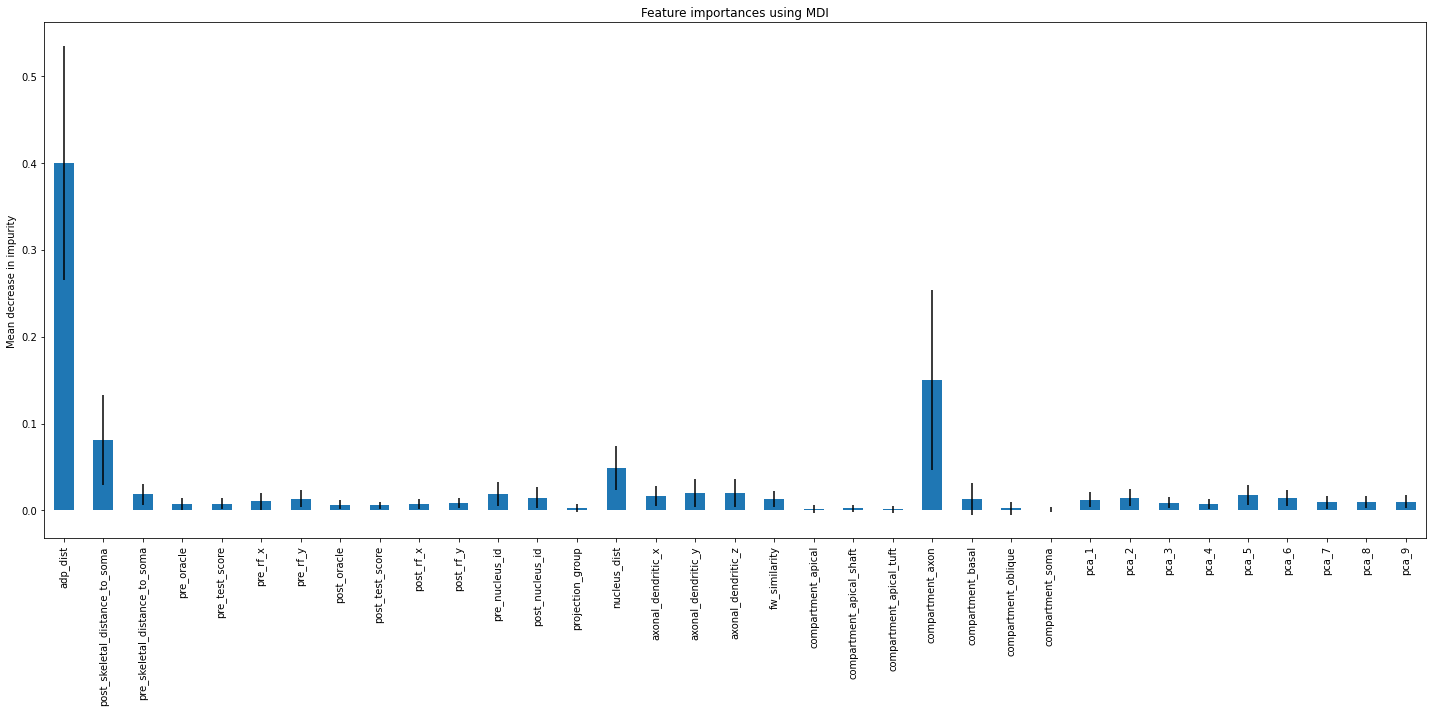

In [33]:
importances = modelRF.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelRF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize = (20,10))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'lambda': [0.5, 1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 4, 6, 8],
        'eta': [0.01, 0.02, 0.05, 0.1]
        }
    
modelXGB = XGBClassifier(n_estimators= 300, objective='binary:logistic', 
                         scale_pos_weight = (len(df[df['connected'] == False]) / len(df[df['connected' ] == True])),
                    verbosity=0)
    
random_search = RandomizedSearchCV(modelXGB, param_distributions=params,
                                   n_iter=30, scoring='f1',
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

start = time.time()
random_search.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = random_search.predict(X_valid)
print(classification_report(y_valid, yhat))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


3296.391356229782
              precision    recall  f1-score   support

       False       1.00      0.77      0.87     18297
        True       0.81      1.00      0.90     18597

    accuracy                           0.88     36894
   macro avg       0.91      0.88      0.88     36894
weighted avg       0.91      0.88      0.88     36894



In [35]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, 20))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results


 All results:
{'mean_fit_time': array([491.40630226, 530.58155684, 290.49787741, 138.1839488 ,
       546.85108533, 316.19008164, 316.75900927, 145.38653259,
       483.29229312, 260.96410904, 270.83904977, 318.32323585,
       155.22437077, 155.60927196, 526.16176424, 661.74148598,
       326.80972786, 345.33466578, 355.62252841, 326.83281064,
       312.27374845, 141.80713902, 568.05861821, 505.38349395,
       581.08122706, 145.1219789 , 422.291606  , 157.55639348,
       169.36514707, 149.70301385]), 'std_fit_time': array([ 1.02419083,  1.85251429,  1.09326942,  4.03045241,  3.34671403,
        1.5833519 ,  1.23186992,  5.99190785,  1.14883672,  1.67943909,
        4.74913677, 16.71907701,  5.62744909,  0.77588614,  1.01584611,
        2.75177684,  1.38094849, 10.79508492,  0.86514764, 10.43837359,
        1.76858053,  0.80480216,  0.91575714,  0.61827435,  2.78997248,
        1.81487702, 20.21543802,  4.63072827,  2.18875525,  7.72543125]), 'mean_score_time': array([0.22502403, 0

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_lambda,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,491.406302,1.024191,0.225024,0.031357,1,5,6,5,5,0.02,0.6,"{'subsample': 1.0, 'min_child_weight': 5, 'max...",0.836133,0.835112,0.834514,0.835424,0.835123,0.835261,0.000527,13
1,530.581557,1.852514,0.199666,0.014998,0.8,1,6,5,2,0.01,1,"{'subsample': 0.8, 'min_child_weight': 1, 'max...",0.809527,0.807271,0.808570,0.807630,0.808127,0.808225,0.000786,14
2,290.497877,1.093269,0.149799,0.016753,1,5,4,2,0.5,0.1,0.8,"{'subsample': 1.0, 'min_child_weight': 5, 'max...",0.874761,0.873218,0.873529,0.872698,0.874288,0.873699,0.000740,8
3,138.183949,4.030452,0.078789,0.004231,0.8,10,2,1,0.5,0.02,0.6,"{'subsample': 0.8, 'min_child_weight': 10, 'ma...",0.748055,0.747583,0.747524,0.747653,0.748013,0.747766,0.000223,29
4,546.851085,3.346714,0.189156,0.035553,0.8,10,6,5,0.5,0.05,1,"{'subsample': 0.8, 'min_child_weight': 10, 'ma...",0.893359,0.893516,0.889777,0.891532,0.892554,0.892147,0.001379,2
5,316.190082,1.583352,0.143217,0.015199,0.6,10,4,5,5,0.1,0.8,"{'subsample': 0.6, 'min_child_weight': 10, 'ma...",0.875442,0.874346,0.871418,0.873089,0.873920,0.873643,0.001347,9
6,316.759009,1.231870,0.137034,0.019128,0.6,5,4,1,1,0.1,0.8,"{'subsample': 0.6, 'min_child_weight': 5, 'max...",0.877956,0.876541,0.875638,0.875473,0.876043,0.876330,0.000892,6
7,145.386533,5.991908,0.088763,0.020135,0.6,5,2,0.5,5,0.05,0.8,"{'subsample': 0.6, 'min_child_weight': 5, 'max...",0.775293,0.773521,0.772836,0.773732,0.773233,0.773723,0.000840,23
8,483.292293,1.148837,0.184506,0.016653,0.8,5,6,0.5,1,0.01,0.6,"{'subsample': 0.8, 'min_child_weight': 5, 'max...",0.799219,0.798229,0.798047,0.799436,0.799518,0.798890,0.000624,21
9,260.964109,1.679439,0.132645,0.015191,1,1,4,2,5,0.1,0.6,"{'subsample': 1.0, 'min_child_weight': 1, 'max...",0.871544,0.870412,0.870355,0.870111,0.870880,0.870660,0.000507,10


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.18536015954334992
              precision    recall  f1-score   support

       False       1.00      0.99      0.99     18297
        True       0.99      1.00      0.99     18597

    accuracy                           0.99     36894
   macro avg       0.99      0.99      0.99     36894
weighted avg       0.99      0.99      0.99     36894



<AxesSubplot:>

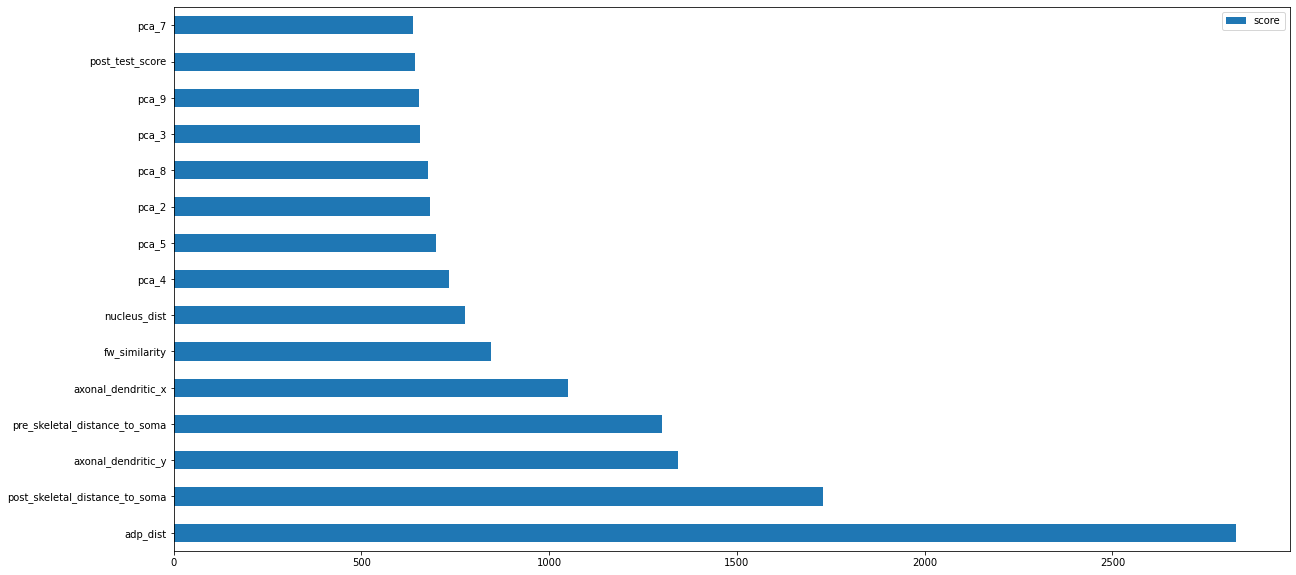

In [51]:
modelXGB.fit(X_train, y_train)

yhat = modelXGB.predict(X_valid)

print(log_loss(yhat, y_valid))
print(classification_report(y_valid, yhat))

feature_important = modelXGB.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(15, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 15 features

### Submission

In [37]:
leader = pd.read_csv('leaderboard_data.csv')
leader

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,pre_brain_area,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id
0,0,527499,544761,912282,529457,543459,916958,4783.37,239163.00,178032.0,...,AL,V1,1368640,451392,861240,566528,777344,920800,582471,199477
1,1,1269890,471870,837816,1271230,469651,841045,4060.72,294573.00,1193910.0,...,AL,RL,1368640,451392,861240,1196352,492736,919560,582471,518848
2,2,666057,469875,925239,665387,467214,923430,2912.80,4102.75,387714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
3,3,696633,453516,925806,696648,453417,921875,3272.83,31123.00,424714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
4,4,567525,585921,888426,570714,583676,891264,4441.75,114201.00,250411.0,...,AL,V1,1368640,451392,861240,672384,609728,932720,582471,260802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42588,42588,765513,818622,870114,766346,817181,871011,1597.63,74187.70,426027.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42589,42589,784476,609000,828177,782564,606911,828562,2607.11,172794.00,553175.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42590,42590,766038,773808,861693,763428,773490,862976,2648.36,44174.50,372663.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42591,42591,738276,614460,855099,741617,612387,854028,3843.24,178179.00,517147.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443


In [38]:
leader = (
    leader.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [52]:
ids = leader['ID']
X_test = leader.drop(columns=['ID'])
X_test = feat_engineering(X_test)
X_test = dim_reduction(X_test)

submit_preds = random_search.predict(X_test)

In [53]:
X_test

,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,pre_rf_x,pre_rf_y,post_oracle,post_test_score,post_rf_x,...,compartment_soma,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,1.569857,1.066950,-1.520389,0.371616,-0.365468,2.580623,-1.409183,0.880813,0.454349,-0.983640,...,-0.106873,-5.609913,-4.229483,1.469810,1.968164,0.171212,1.993987,-2.443450,-0.281724,1.504999
1,1.072992,1.548930,0.949414,0.371616,-0.365468,2.580623,-1.409183,1.170133,-0.223748,-0.437916,...,-0.106873,-4.749806,5.818121,1.286582,-1.339145,2.207097,3.589834,-1.136232,-0.962766,1.626897
2,0.283729,-0.977701,-1.010610,0.371616,-0.365468,2.580623,-1.409183,-0.889101,0.590201,-0.438236,...,-0.106873,-3.786801,7.551665,1.057204,3.911097,0.974384,1.846460,1.159665,0.488684,1.600183
3,0.531271,-0.742668,-0.920656,0.371616,-0.365468,2.580623,-1.409183,-0.889101,0.590201,-0.438236,...,-0.106873,-3.786801,7.551665,1.057204,3.911097,0.974384,1.846460,1.159665,0.488684,1.600183
4,1.334973,-0.020021,-1.344421,0.371616,-0.365468,2.580623,-1.409183,0.581479,0.526492,-0.489448,...,-0.106873,-5.125207,-0.359366,1.141974,0.846707,-1.326007,1.998118,3.771432,0.580501,1.409632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42588,-0.620528,-0.368073,-0.917464,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,-0.106873,5.233362,-2.515539,-1.905698,-0.002798,4.323730,1.355226,1.738654,-2.717330,0.246200
42589,0.073549,0.489645,-0.608341,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,-0.106873,5.233362,-2.515539,-1.905698,-0.002798,4.323730,1.355226,1.738654,-2.717330,0.246200
42590,0.101911,-0.629141,-1.047202,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,-0.106873,5.233362,-2.515539,-1.905698,-0.002798,4.323730,1.355226,1.738654,-2.717330,0.246200
42591,0.923462,0.536486,-0.695932,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,-0.106873,5.233362,-2.515539,-1.905698,-0.002798,4.323730,1.355226,1.738654,-2.717330,0.246200


In [54]:
X_test.columns[X_test.isna().any()].tolist()


[]

In [55]:
submit = pd.DataFrame(submit_preds, columns = ['connected'])
submit = submit['connected'].replace({0:False, 1:True})
submit = pd.DataFrame(submit, columns = ['connected'])
submit['ID'] = ids
submit = submit[['ID','connected']]


submit.head()

,ID,connected
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [56]:
submit.to_csv('submissionv.csv', index=False)


In [57]:
submit.connected.value_counts()

False    34382
True      8211
Name: connected, dtype: int64